In [1]:
# 雲端硬碟授權
from google.colab import drive
drive.mount('/content/gdrive') # 此處需登入google帳號

Mounted at /content/gdrive


Found 1074 images belonging to 15 classes.
Found 90 images belonging to 15 classes.
Epoch 1/115
67/67 [==============================] - 489s 7s/step - loss: 2.3624 - accuracy: 0.1380 - val_loss: 2.1689 - val_accuracy: 0.1625
Epoch 2/115
67/67 [==============================] - 64s 945ms/step - loss: 2.1465 - accuracy: 0.1758 - val_loss: 1.9329 - val_accuracy: 0.2875
Epoch 3/115
67/67 [==============================] - 65s 950ms/step - loss: 1.9108 - accuracy: 0.2760 - val_loss: 1.7415 - val_accuracy: 0.3125
Epoch 4/115
67/67 [==============================] - 64s 951ms/step - loss: 1.7692 - accuracy: 0.3412 - val_loss: 1.5396 - val_accuracy: 0.4625
Epoch 5/115
67/67 [==============================] - 65s 955ms/step - loss: 1.7319 - accuracy: 0.3459 - val_loss: 1.7043 - val_accuracy: 0.4500
Epoch 6/115
67/67 [==============================] - 62s 925ms/step - loss: 1.6767 - accuracy: 0.3677 - val_loss: 1.5020 - val_accuracy: 0.4500
Epoch 7/115
67/67 [==============================] - 6

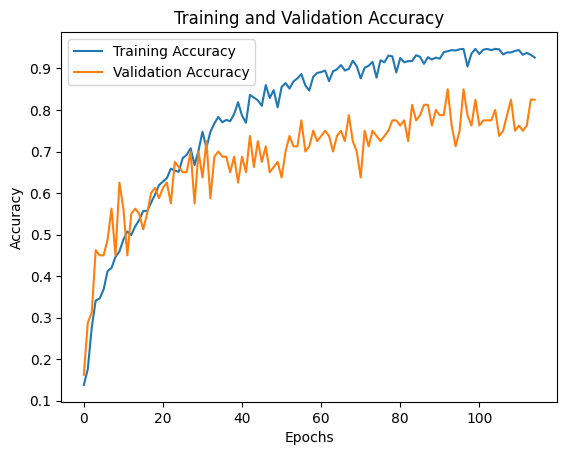

6/6 [==============================] - 1s 201ms/step - loss: 0.8110 - accuracy: 0.8333
Validation Accuracy: 83.33%


In [2]:
# 自己建的model

import os
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 定義圖片資料路徑
folder_path = '/content/gdrive/My Drive/70_dog'
train_data_dir = folder_path+'/train'
valid_data_dir = folder_path+'/valid'
test_data_dir = folder_path+'/test'

# 定義圖片資料維度與批次大小
img_width, img_height = 150, 150
batch_size = 16   # 採較小batch_size以減少overfitting情況

# 題目指定品種
classes = ["Airedale", "Beagle", "Bloodhound", "Bluetick", "Chihuahua", "Collie",
           "Dingo", " French Bulldog", " German Sheperd", " Malinois", " Newfoundland",
           " Pekinese", " Pomeranian", "Pug", "Vizsla"]

# 建立圖形資料生成器以進行資料加強,提高模型之泛化能力及穩定性
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

valid_datagen = ImageDataGenerator(rescale = 1./255)

# 訓練資料從資料生成器中讀取
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    classes = classes,  # 僅取指定品種
    class_mode = 'categorical'  # 解決圖像分類問題,故使用categorical
)

valid_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    classes = classes,  # 僅取指定品種
    class_mode = 'categorical'  # 解決圖像分類問題,故使用categorical
)

# 建立模型
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))  # 減少over_fitting情況
model.add(Dense(len(classes), activation = 'softmax'))  # 輸出層

# 編譯模型,尚未試出效果較好的SGD_learning_rate故採Adam動態調整
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

# 訓練模型
training = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 115,
    validation_data = valid_generator,
    validation_steps = valid_generator.samples // batch_size
)

# 繪製訓練與驗證準確率隨Epochs的變化圖
plt.plot(training.history['accuracy'], label = 'Training Accuracy')
plt.plot(training.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# 評估模型
scores = model.evaluate(valid_generator)
print("Validation Accuracy: %.2f%%" % (scores[1]*100))


# 依指定路徑儲存模型
folder_path = folder_path+'/self'
os.makedirs(folder_path ,exist_ok = True)   # 創建資料夾
model.save(folder_path)

Found 1714 images belonging to 15 classes.
Found 150 images belonging to 15 classes.
83683744/83683744 [==============================] - 1s 0us/step
Epoch 1/50
26/26 [==============================] - 753s 30s/step - loss: 1.0191 - accuracy: 0.7679 - val_loss: 0.2323 - val_accuracy: 0.9766
Epoch 2/50
26/26 [==============================] - 9s 327ms/step - loss: 0.2690 - accuracy: 0.9461 - val_loss: 0.1332 - val_accuracy: 0.9766
Epoch 3/50
26/26 [==============================] - 8s 318ms/step - loss: 0.1835 - accuracy: 0.9570 - val_loss: 0.0789 - val_accuracy: 0.9922
Epoch 4/50
26/26 [==============================] - 9s 351ms/step - loss: 0.1440 - accuracy: 0.9661 - val_loss: 0.0831 - val_accuracy: 0.9844
Epoch 5/50
26/26 [==============================] - 10s 364ms/step - loss: 0.1263 - accuracy: 0.9703 - val_loss: 0.0818 - val_accuracy: 0.9844
Epoch 6/50
26/26 [==============================] - 9s 332ms/step - loss: 0.1180 - accuracy: 0.9697 - val_loss: 0.0688 - val_accuracy: 0.99

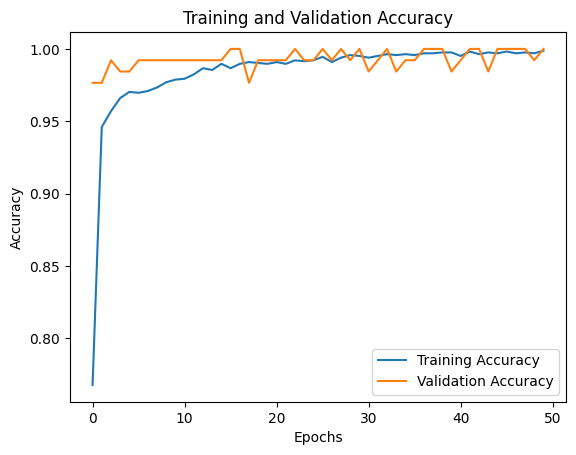

3/3 [==============================] - 3s 1s/step - loss: 0.0329 - accuracy: 1.0000
Validation Accuracy: 100.00%


In [ ]:
# Fine_Turning_Xception

import os
import matplotlib.pyplot as plt
from keras.optimizers import SGD
from keras.models import Sequential
from keras.applications import Xception
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

# 定義圖片資料路徑
folder_path = '/content/gdrive/My Drive/70_dog'
train_data_dir = folder_path+'/train'
valid_data_dir = folder_path+'/valid'
test_data_dir = folder_path+'/test'

# 定義圖片資料維度與批次大小
img_width, img_height = 150, 150
batch_size = 64

# 題目指定品種
classes = ["Airedale", "Beagle", "Bloodhound", "Bluetick", "Chihuahua", "Collie",
           "Dingo", "French Bulldog", "German Sheperd", "Malinois", "Newfoundland",
           "Pekinese", "Pomeranian", "Pug", "Vizsla"]

# 建立圖形資料生成器以進行資料加強,提高模型之泛化能力及穩定性
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True
)

valid_datagen = ImageDataGenerator(rescale = 1./255)

# 訓練資料從資料生成器中讀取
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    classes = classes,  # 僅取指定品種
    class_mode = 'categorical'  # 解決圖像分類問題,故使用categorical
)

valid_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    classes = classes,  # 僅取指定品種
    class_mode = 'categorical'  # 解決圖像分類問題,故使用categorical
)

# 加載Xception模型,因圖片為彩色,故input_shape中通道數設為3
base_model = Xception(weights = 'imagenet', include_top = False, input_shape = (img_width, img_height, 3))

# 將Xception模型各層設為不可訓練
for layer in base_model.layers:
    layer.trainable = False

# 在頂部添加新的全連接層
model = Sequential()
model.add(base_model)  # 將Xception設為基礎模型
model.add(Flatten())  # 將圖像轉為一維數組讓dense層處理
model.add(Dense(128, activation = 'relu'))
model.add(Dense(len(classes), activation = 'softmax'))  # 輸出層

# 編譯模型,因題目為多類別分類問題,故loss函數採categorical_crossentropy
model.compile(optimizer = SGD(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

# 訓練模型
training = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 50,
    validation_data = valid_generator,
    validation_steps = valid_generator.samples // batch_size
)

# 繪製訓練與驗證準確率隨Epochs的變化圖
plt.plot(training.history['accuracy'], label = 'Training Accuracy')
plt.plot(training.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# 評估模型
scores = model.evaluate(valid_generator)
print("Validation Accuracy: %.2f%%" % (scores[1]*100))

# 依指定路徑儲存模型
folder_path = folder_path+'/fine turning'
os.makedirs(folder_path ,exist_ok = True)  # 創建資料夾
model.save(folder_path)

In [ ]:
import os
import numpy as np
from PIL import Image
import pandas as pd
import tensorflow as tf

# 載入模型,其中fine turning資料夾可改成self資料夾以使用自建模型
folder_path = '/content/gdrive/My Drive/70_dog/fine turning'
model = tf.keras.models.load_model(folder_path)


# 輸入testing資料
image_folder = '/content/gdrive/My Drive/70_dog/70_dog_testing_set'

# 獲取資料夾內所有圖片路徑
image_paths = [os.path.join(image_folder, filename) for filename in os.listdir(image_folder) if filename.endswith('.jpg')]

# 將資料夾內圖片轉為與模型相符格式
input_images = []
for image_path in image_paths:
    image = Image.open(image_path)
    image = image.resize((150, 150))
    image = np.array(image) / 255.0
    input_images.append(image)

# 將圖片轉為numpy格式
input_images = np.array(input_images)

# 使用模型進行預測
predictions = model.predict(input_images)

# 指定類別
class_names = ["Airedale", "Beagle", "Bloodhound", "Bluetick", "Chihuahua", "Collie",
           "Dingo", " French Bulldog", " German Sheperd", " Malinois", " Newfoundland",
           " Pekinese", " Pomeranian", "Pug", "Vizsla"]

# 提取預測結果
predicted_classes = []
for prediction in predictions:
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_names[predicted_class_index]
    predicted_classes.append(predicted_class)

# 提取各圖片之檔名
image_file_names = [os.path.basename(image_path) for image_path in image_paths]

# 將結果依格式儲存
data = {'檔名': image_file_names, '結果': predicted_classes}
df = pd.DataFrame(data)

# 將結果儲存至test_data.xlsx
output_file = folder_path+'/test_data.xlsx'
df.to_excel(output_file, index = False)


10/10 [==============================] - 1s 34ms/step
